In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from statsmodels.stats.proportion import proportions_ztest


In [4]:
#tis = 'liver'
def get_ratio(df):
    tem = df[df.disrupted == 1]
    print(len(np.unique(tem.snp)))
    print(len(np.unique(df.snp)))
    return len(np.unique(tem.snp))/len(np.unique(df.snp))

def get_disrupt(df):
    tem = df[df.disrupted == 1]
    return tem

In [65]:
def process_tissue(tis, n_motif = 746):
    df = pd.read_csv(f'data/lead_snp_discruption/{tis.lower()}_disrupted.csv.gz')
    bed = pd.read_csv(f'data/randomized_tie_lead_snps/{tis}_atac_randomized_tie_lead_snp.txt', sep='\t')
    bed.columns = ['snp', 'gene', 'statistic', 'pvalue', 'FDR', 'beta', 'BF', 'TESTS']
    bed_sig = bed[bed.BF < 0.1]
    bed_null = bed[bed.BF >= 0.1]
    null_df = df[df.snp.isin(bed_null.snp)]
    sig_df = df[df.snp.isin(bed_sig.snp)]
    dis_null = get_disrupt(null_df)
    dis_sig = get_disrupt(sig_df)
    
    null_rate = len(dis_null)/len(bed_null.snp.unique())
    sig_rate = len(dis_sig)/len(bed_sig.snp.unique())
    
    print(f'sig: {sig_rate}')
    print(f'null: {null_rate}')

    success_null = len(dis_null)
    sucess_sig = len(dis_sig)
    
    trial_null = (len(bed_null.snp.unique())*n_motif)
    trial_sig = (len(bed_sig.snp.unique())*n_motif)
    
    successes = [success_null, sucess_sig] 
    trials = [trial_null, trial_sig]
    
    
    # Perform the z-test for proportions
    stat, p_value = proportions_ztest(successes, trials)
    print(f"Z-statistic: {stat:.4f}")
    print(f"P-value: {p_value}")
    print(successes)
    print(trials)
    out1=f'data/lead_snp_discruption/{tis.lower()}_sig_disrupted.csv'
    out2=f'data/lead_snp_discruption/{tis.lower()}_null_disrupted.csv'
    dis_sig.to_csv(out1, index=False)
    dis_null.to_csv(out2, index=False)
    return null_rate, sig_rate, p_value
    

In [66]:
brain_all, brain_sig, brain_p = process_tissue('brain')

sig: 1.1106719367588933
null: 0.9963202707421235
Z-statistic: -2.5739
P-value: 0.010056624032892956
[148376, 562]
[111097304, 377476]


In [67]:
111097304/746

148924.0

In [68]:
148376/148924.0

0.9963202707421235

In [69]:
gonad_all, gonad_sig, gonad_p = process_tissue('gonad')

sig: 0.9863636363636363
null: 0.9956480163199388
Z-statistic: 0.1380
P-value: 0.8902099754247292
[234271, 217]
[175530070, 164120]


In [70]:
175530070/746

235295.0

In [71]:
liver_all, liver_sig, liver_p = process_tissue('liver')

sig: 1.1862745098039216
null: 1.0037865395947019
Z-statistic: -3.1854
P-value: 0.0014455123780315019
[195904, 363]
[145593090, 228276]


In [72]:
145593090/746

195165.0

In [73]:
195165.0/195904

0.9962277442012414

In [74]:
muscle_all, muscle_sig, muscle_p = process_tissue('muscle')

sig: 1.2442748091603053
null: 1.0039657769676995
Z-statistic: -2.7459
P-value: 0.006033656980611078
[241259, 163]
[179268276, 97726]


In [75]:
179268276/746

240306.0

In [76]:
97726/746 #muscle

131.0

In [77]:
228276/746 #liver

306.0

In [78]:
164120/746 #gonad

220.0

In [79]:
377476/746 #brain

506.0

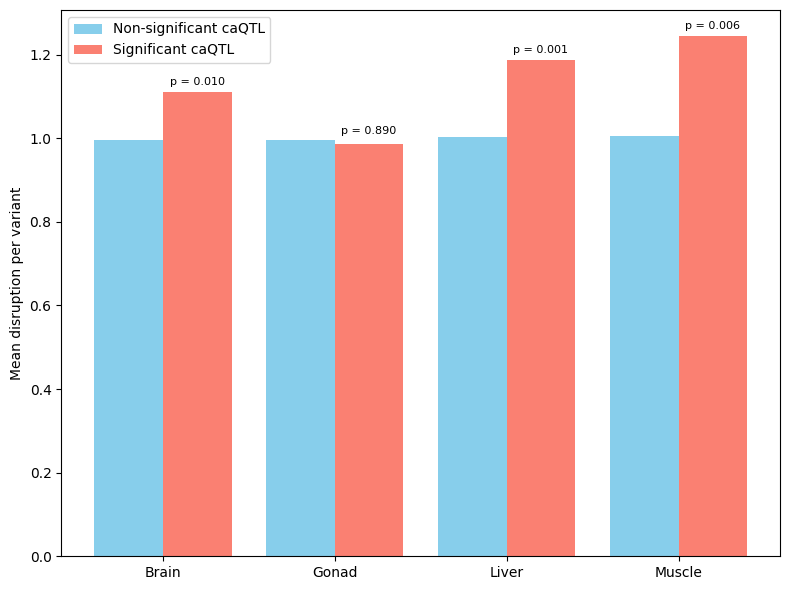

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Data values
categories = ['Brain', 'Gonad', 'Liver', 'Muscle']
all_counts = [brain_all, gonad_all, liver_all, muscle_all]
sig_counts = [brain_sig, gonad_sig, liver_sig, muscle_sig]
p_values = [brain_p, gonad_p, liver_p, muscle_p]

# Bar width and positions
bar_width = 0.4
x = np.arange(len(categories))

# Create the bar plot
plt.figure(figsize=(8, 6))
bars1 = plt.bar(x - bar_width/2, all_counts, width=bar_width, label='Non-significant caQTL', color='skyblue')
bars2 = plt.bar(x + bar_width/2, sig_counts, width=bar_width, label='Significant caQTL', color='salmon')

# Add p-value annotations
for i in range(len(categories)):
    # Format p-value with scientific notation if very small
    if p_values[i] < 0.001:
        p_text = f'p = {p_values[i]:.2e}'
    else:
        p_text = f'p = {p_values[i]:.3f}'
        
    # Get the height of the taller bar for each category
    height = max(all_counts[i], sig_counts[i])
    
    # Add text above the bars - shifted right by adding bar_width/2 to x[i]
    plt.text(x[i] + bar_width/2, height + height*0.01, p_text, 
             ha='center', va='bottom', fontsize=8)

# Labels and titles
plt.xticks(x, categories)
plt.ylabel('Mean disruption per variant')
plt.title('')
plt.legend()

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot
plt.savefig("Fig4.pdf", format='pdf')

# Display the plot
plt.show()


In [82]:
# Create a dictionary with the data
data = {
    'Tissue': categories,
    'Mean_discruption_all_peaks': all_counts,
    'Mean_discruption_significant_peaks': sig_counts,
    'P_values': p_values
}

# Create a DataFrame
df = pd.DataFrame(data)

# Write to CSV
df.to_csv('data/tissue_discuptions.csv', index=False)